In [2]:
# dg casting void

Next, change directory to wherever you created your folder. 

In [1]:
import os, datetime

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/cast02'
WORKING_DIRECTORY = '/notebooks/ml635e/cast03'

OUT = '/home/studio-lab-user/ml635e/out'
os.chdir(WORKING_DIRECTORY)
os.mkdir(OUT)
!pwd

FileNotFoundError: [Errno 2] No such file or directory: '/home/studio-lab-user/ml635e/cast02'

In [9]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls -la

total 16
drwxrwxr-x 7 studio-lab-user users   70 Jun  9 09:33 .
drwxr-xr-x 9 studio-lab-user users  217 Jun  9 13:43 ..
drwxrwxr-x 2 studio-lab-user users  167 Jun  9 09:34 excl
drwxrwxr-x 2 studio-lab-user users 4096 Jun  9 09:34 images
drwxrwxr-x 2 studio-lab-user users 4096 Jun  9 09:35 train
drwxrwxr-x 2 studio-lab-user users 4096 Jun  9 09:32 unused
drwxrwxr-x 2 studio-lab-user users 4096 Jun  9 09:35 val


Now, let's install the Detecto package using pip. 

In [5]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

  Using cached torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl (750.6 MB)
  Using cached torchvision-0.12.0-cp39-cp39-manylinux1_x86_64.whl (21.0 MB)


Import everything we need in the following code block:

In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

In [11]:
%%bash
find ./images -type f | tail -n1

./images/cast_def_0_94.jpeg


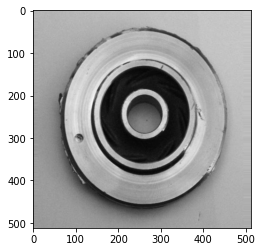

In [12]:
image = utils.read_image('./images/cast_def_0_94.jpeg')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [13]:
# Do this twice: once for our trning labels and once for our validation labels
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('val', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,cast_def_0_1015.jpeg,512,512,Void,202,387,224,402,0
1,cast_def_0_1077.jpeg,512,512,Void,262,417,285,442,1
2,cast_def_0_1112.jpeg,512,512,Void,279,482,307,497,2
3,cast_def_0_1115.jpeg,512,512,Void,155,134,171,154,3
4,cast_def_0_1137.jpeg,512,512,Void,185,88,197,100,4
5,cast_def_0_1155.jpeg,512,512,Void,55,124,93,152,5
6,cast_def_0_1283.jpeg,512,512,Void,165,406,197,447,6
7,cast_def_0_1381.jpeg,512,512,Void,276,460,313,493,7
8,cast_def_0_1443.jpeg,512,512,Void,132,312,152,333,8
9,cast_def_0_1443.jpeg,512,512,Void,235,408,244,414,8


Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

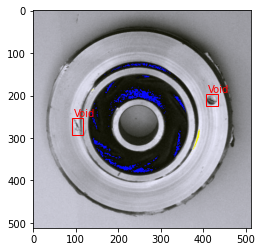

In [14]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [28]:
!date -d "-4 hours"

Thu Jun  9 10:56:16 UTC 2022


In [40]:
import datetime
dtnow = datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S")
print (dtnow)
stuff_in_string = f"Now is {dtnow} time."
print(stuff_in_string)

2022-06-09_15.16.24
Now is 2022-06-09_15.16.24 time.


Thu Jun  9 14:27:25 America 2022
It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:58<00:00, 11.84s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.71s/it]


Loss: 0.27939523277538164
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:55<00:00, 11.52s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


Loss: 0.2649669104388782
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:56<00:00, 11.63s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


Loss: 0.2359439187816211
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:54<00:00, 11.42s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.66s/it]


Loss: 0.24116982306752885
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:54<00:00, 11.47s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


Loss: 0.24138279578515462
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:56<00:00, 11.64s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:24<00:00,  1.74s/it]


Loss: 0.23988278582692146
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [02:19<00:00, 13.95s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:43<00:00,  3.10s/it]


Loss: 0.24064307659864426
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:13<00:00, 19.36s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:43<00:00,  3.07s/it]


Loss: 0.2436955352979047
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:13<00:00, 19.36s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:42<00:00,  3.04s/it]


Loss: 0.2411060631275177
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:12<00:00, 19.29s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:43<00:00,  3.08s/it]

Loss: 0.2424863257578441


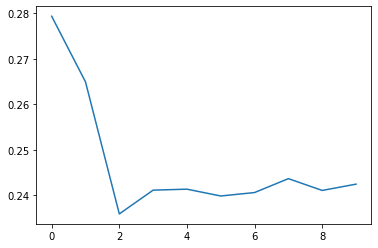

Thu Jun  9 14:56:16 America 2022


In [27]:
# Create our validation dataset
!date -d "-4 hours"
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Void'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()
!date -d "-4 hours"


In [48]:
dtnow = datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S")
fout = f"modelweights_{dtnow}.pth"
model.save(fout)
# model.save("modelweight.pth")
!pwd;ls

/home/studio-lab-user/ml635e/cast02
excl	modelweights_2022-06-09_15.23.49.pth  train	 unused  val.csv
images	modelweights_2022-06-09_15.24.08.pth  train.csv  val


Let's see how well our model does on a couple images from our validation set:

tensor([[[ 0.2796,  0.3138,  0.3481,  ..., -0.0116,  0.0056,  0.0398],
         [ 0.2796,  0.3138,  0.3481,  ..., -0.0116,  0.0056,  0.0398],
         [ 0.2796,  0.3138,  0.3481,  ..., -0.0116,  0.0056,  0.0398],
         ...,
         [ 0.5707,  0.6734,  0.6221,  ...,  0.6221,  0.6563,  0.6563],
         [ 0.5707,  0.6734,  0.6221,  ...,  0.6221,  0.6563,  0.6563],
         [ 0.5707,  0.6734,  0.6221,  ...,  0.6221,  0.6563,  0.6563]],

        [[ 0.4153,  0.4503,  0.4853,  ...,  0.1176,  0.1352,  0.1702],
         [ 0.4153,  0.4503,  0.4853,  ...,  0.1176,  0.1352,  0.1702],
         [ 0.4153,  0.4503,  0.4853,  ...,  0.1176,  0.1352,  0.1702],
         ...,
         [ 0.7129,  0.8179,  0.7654,  ...,  0.7654,  0.8004,  0.8004],
         [ 0.7129,  0.8179,  0.7654,  ...,  0.7654,  0.8004,  0.8004],
         [ 0.7129,  0.8179,  0.7654,  ...,  0.7654,  0.8004,  0.8004]],

        [[ 0.6356,  0.6705,  0.7054,  ...,  0.3393,  0.3568,  0.3916],
         [ 0.6356,  0.6705,  0.7054,  ...,  0

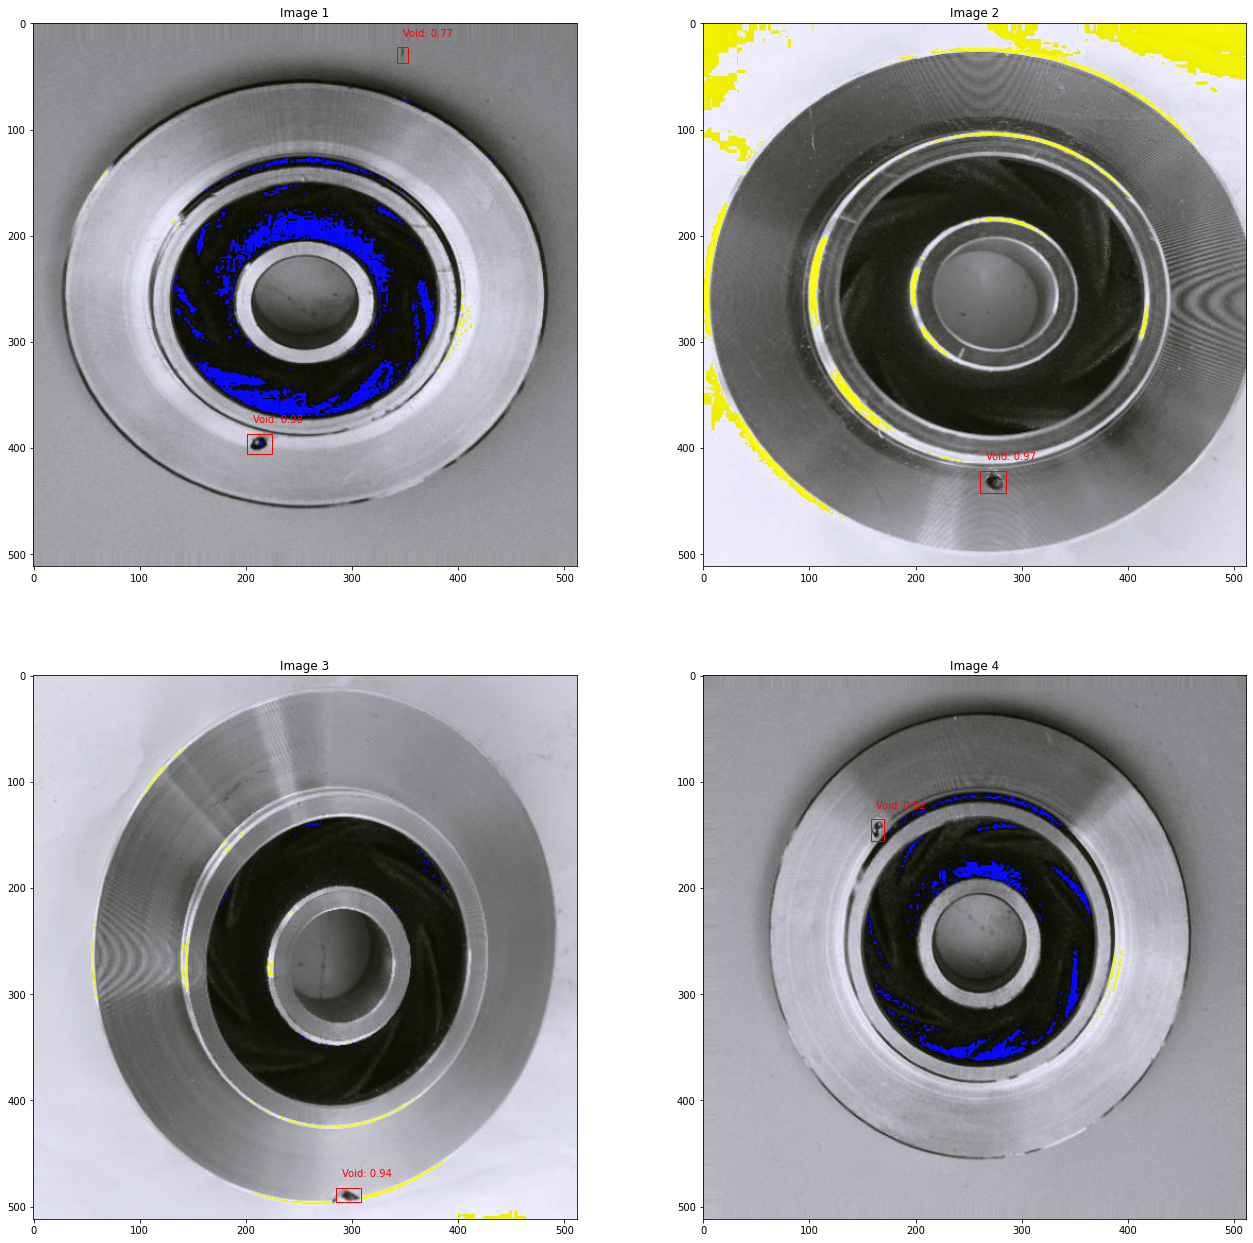

In [32]:
images = []
# Create a list of images  from val_dataset
for i in range(0, 4, 1):
    image, _ = val_dataset[i]
    images.append(image)
    print(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(2, 2), figsize=(22,22))

## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!